In [ ]:
!pip install -r requirements.txt

In [16]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


## Defining Image Transformations

In [18]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

## Downloading the CIFAR-10 dataset

In [19]:
train_set = torchvision.datasets.CIFAR10(root=' ./data', train=True,
                                        download=True, transform=transform)

test_set = torchvision.datasets.CIFAR10(root=' ./data', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


## Creating DataLoaders

In [20]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64,
                                          shuffle=True, num_workers=2)

test_loader = torch.utils.data.DataLoader(test_set, batch_size=64,
                                         shuffle=False, num_workers=2)

## Few training Images 

In [21]:
classes = ('plane', 'car','bird','cat', 
           'deer','dog','frog','horse','ship','truck')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.figure(figsize=(8, 4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

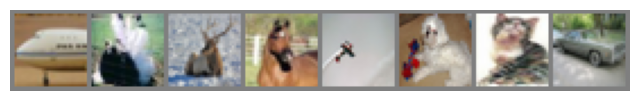

Labels: plane bird deer horse plane dog cat car


In [22]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

imshow(torchvision.utils.make_grid(images[:8]))

print('Labels:', ' '.join(f'{classes[labels[j]]}' for j in range (8)))

In [23]:
# summary cell

print("CIFAR-10 loaded and visualized")
print(f"Training samples: {len(train_set)}, Test samples: {len(test_set)}")

CIFAR-10 loaded and visualized
Training samples: 50000, Test samples: 10000
